In [20]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
model = SVC(kernel='linear')

In [4]:
cv_scores = cross_val_score(model, X, y, cv=5)

In [5]:
cv_scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [6]:
cv_scores.mean()

0.9800000000000001

In [8]:
y_pred = cross_val_predict(model, X, y, cv=5)

In [10]:
cm = confusion_matrix(y, y_pred)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

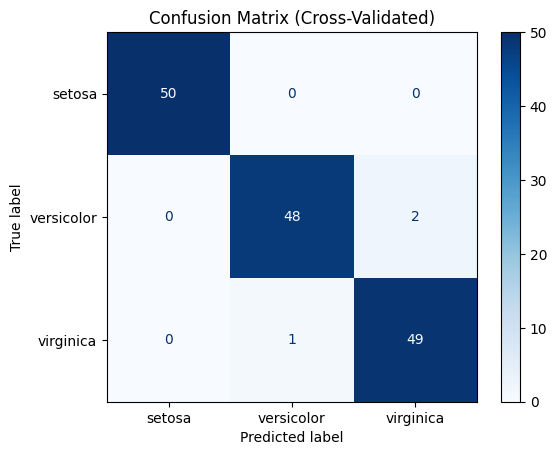

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated)")
plt.show()

In [17]:
classification_report(y, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        50\n           1       0.98      0.96      0.97        50\n           2       0.96      0.98      0.97        50\n\n    accuracy                           0.98       150\n   macro avg       0.98      0.98      0.98       150\nweighted avg       0.98      0.98      0.98       150\n'

In [21]:
report_dict = classification_report(y, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,1.000000,1.00,1.000000,50.00
1,0.979592,0.96,0.969697,50.00
2,0.960784,0.98,0.970297,50.00
accuracy,0.980000,0.98,0.980000,0.98
macro avg,0.980125,0.98,0.979998,150.00
weighted avg,0.980125,0.98,0.979998,150.00
